In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

In [2]:
disease_df = pd.read_csv("framingham.csv")

In [ ]:
disease_df.info()

In [ ]:
disease_df.describe()

In [3]:
disease_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [4]:
# education has no effect on the disease
disease_df.drop(['education'], inplace=True, axis=1)

In [5]:
disease_df.dropna(inplace=True, axis=0)
disease_df.reset_index(drop=True, inplace=True)

In [6]:
disease_df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
3747,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
3748,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
3749,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [7]:
corr_matrix = disease_df.loc[:, disease_df.columns != 'TenYearCHD'].corr()
corr_matrix = corr_matrix.round(2)

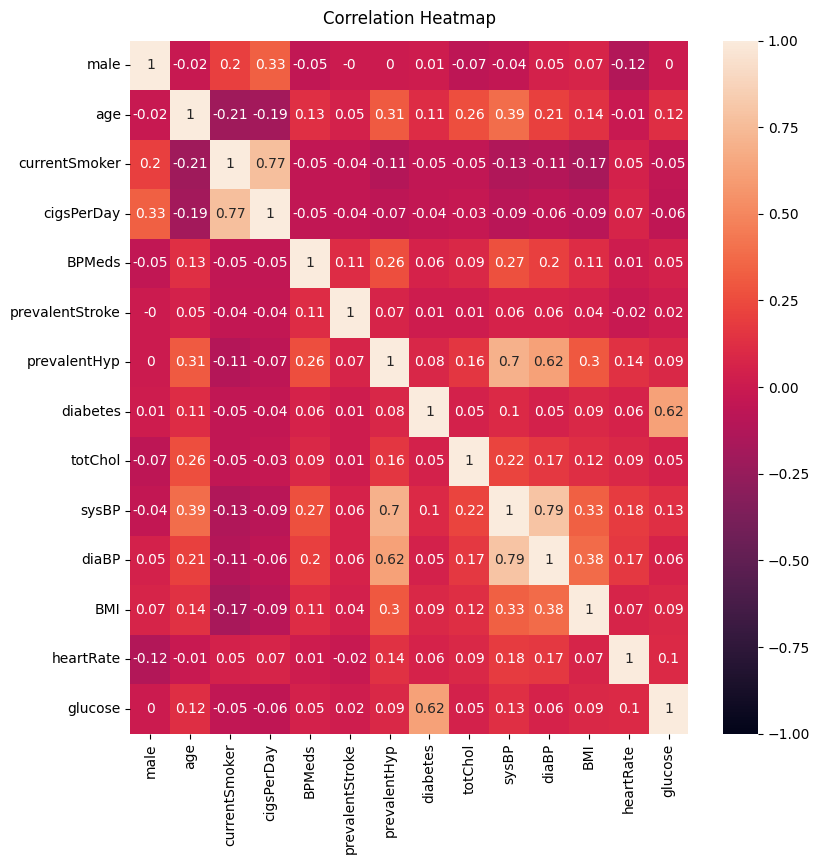

In [8]:
# Increase the size of the heatmap.
plt.figure(figsize=(9, 9))
heatmap = sns.heatmap(corr_matrix,vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [21]:
x = disease_df.loc[:, ['male', 'age', 'cigsPerDay', 'sysBP', 'diaBP', 'glucose']]
y = disease_df['TenYearCHD']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(x)
# create a new DataFrame with the scaled data
x_new = pd.DataFrame(df_scaled, columns=x.columns)

In [11]:
y.value_counts()

,count
TenYearCHD,
0,3179
1,572


In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.33, shuffle=True)

In [24]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [35]:
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred,sample_weight=y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {round(acc,2)}')
print(f'Balanced Accuracy: {round(bal_acc,2)}')
print(f'f1: {round(f1,2)}')
print(f'Precision: {round(precision,2)}')
print(f'Recall: {round(recall,2)}')
print(f'Conf matrix: ')
print(cm)

Accuracy: 0.67
Balanced Accuracy: 0.5
f1: 0.4
Precision: 0.28
Recall: 0.69
Conf matrix: 
[[688 349]
 [ 62 139]]


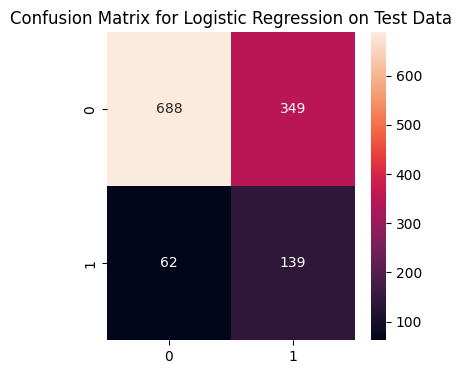

In [33]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='g')
plt.title("Confusion Matrix for Logistic Regression on Test Data")
plt.show()